# KNN

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os

import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for swarmplot/stripplot


from google.colab import drive
drive.mount('/content/drive')

folder_path = '/content/drive/MyDrive/results_knn'

Mounted at /content/drive


In [2]:
results = {'grid': [], 'sick': []}  # Dictionary to store results

for dataset_type in ['grid', 'sick']:
    for i in range(10):
        filename = f"results_{dataset_type}_{i}.csv"
        file_path = os.path.join(folder_path, filename)
        if os.path.exists(file_path):
            results[dataset_type].append(pd.read_csv(file_path))
        else:
            print(f"Archivo no encontrado: {filename}")

results_grid = results['grid']
results_sick = results['sick']

In [3]:
def average_dataframes(dataframes):

  # Concatenate all DataFrames into a single DataFrame
  combined_df = pd.concat(dataframes)

  # Group by the relevant columns and calculate the mean
  averaged_df = combined_df.groupby(['K', 'Distance', 'Voting scheme', 'Weight scheme'])[['Accuracy', 'Solving Time']].mean().reset_index()

  return averaged_df

# Calculate the average for 'grid' and 'sick' datasets
averaged_grid = average_dataframes(results['grid'])
averaged_sick = average_dataframes(results['sick'])

averaged_results = {
    'grid': averaged_grid,
    'sick': averaged_sick
}


## Funciones

In [4]:
def average_accuracy(df, title):
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))  # 2 rows, 2 columns

    # Subplot 1 - Grouped by 'K'
    grouped_k = df.groupby('K')
    for i, (key, group) in enumerate(grouped_k):
        axes[0, 0].violinplot(group['Accuracy'], positions=[i])  # Usa `positions` para ubicar cada violín
        axes[0, 0].scatter([i] * len(group), group['Accuracy'])

    axes[0, 0].set_title('K')
    axes[0, 0].set_xlabel('K Value')
    axes[0, 0].set_ylabel('Average Accuracy')
    axes[0, 0].set_xticks(range(len(grouped_k)))
    axes[0, 0].set_xticklabels([f'k = {key}' for key in grouped_k.groups.keys()])
    axes[0, 0].grid(True)

    # Subplot 2 - Grouped by 'Distance'
    grouped_distance = df.groupby('Distance')
    for i, (key, group) in enumerate(grouped_distance):
        axes[0, 1].violinplot(group['Accuracy'], positions=[i])  # Usa `positions` para ubicar cada violín
        axes[0, 1].scatter([i] * len(group), group['Accuracy'])

    axes[0, 1].set_title('Distance')
    axes[0, 1].set_xlabel('Distance Metric')
    axes[0, 1].set_ylabel('Average Accuracy')
    axes[0, 1].set_xticks(range(len(grouped_distance)))
    axes[0, 1].set_xticklabels(grouped_distance.groups.keys())
    axes[0, 1].grid(True)

    # Subplot 3 - Grouped by 'Voting scheme'
    grouped_voting = df.groupby('Voting scheme')
    for i, (key, group) in enumerate(grouped_voting):
        axes[1, 0].violinplot(group['Accuracy'], positions=[i])  # Usa `positions` para ubicar cada violín
        axes[1, 0].scatter([i] * len(group), group['Accuracy'])

    axes[1, 0].set_title('Voting Scheme')
    axes[1, 0].set_xlabel('Voting Scheme')
    axes[1, 0].set_ylabel('Average Accuracy')
    axes[1, 0].set_xticks(range(len(grouped_voting)))
    axes[1, 0].set_xticklabels(grouped_voting.groups.keys())
    axes[1, 0].grid(True)

    # Subplot 4 - Grouped by 'Weight scheme'
    grouped_weight = df.groupby('Weight scheme')
    for i, (key, group) in enumerate(grouped_weight):
        axes[1, 1].violinplot(group['Accuracy'], positions=[i])  # Usa `positions` para ubicar cada violín
        axes[1, 1].scatter([i] * len(group), group['Accuracy'])

    axes[1, 1].set_title('Weight Scheme')
    axes[1, 1].set_xlabel('Weight Scheme')
    axes[1, 1].set_ylabel('Average Accuracy')
    axes[1, 1].set_xticks(range(len(grouped_weight)))
    axes[1, 1].set_xticklabels(grouped_weight.groups.keys())
    axes[1, 1].grid(True)

    fig.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta layout para el título
    return plt.show()

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def average_accuracy(df, title):
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))

    # Subplot 1 - Grouped by 'K' with data points
    grouped_k = df.groupby('K')
    for i, (key, group) in enumerate(grouped_k):
        axes[0, 0].violinplot(group['Accuracy'], positions=[i])
        sns.swarmplot(x='K', y='Accuracy', data=df[df['K'] == key], color='black', size=3, ax=axes[0, 0])

    axes[0, 0].set_title('K')
    axes[0, 0].set_xlabel('K Value')
    axes[0, 0].set_ylabel('Average Accuracy')
    axes[0, 0].set_xticks(range(len(grouped_k)))
    axes[0, 0].set_xticklabels([f'k = {key}' for key in grouped_k.groups.keys()])
    axes[0, 0].grid(True)

    # Subplot 2 - Grouped by 'Distance' with data points
    grouped_distance = df.groupby('Distance')
    for i, (key, group) in enumerate(grouped_distance):
        axes[0, 1].violinplot(group['Accuracy'], positions=[i])
        sns.swarmplot(x='Distance', y='Accuracy', data=df[df['Distance'] == key], color='black', size=3, ax=axes[0, 1])

    axes[0, 1].set_title('Distance')
    axes[0, 1].set_xlabel('Distance Metric')
    axes[0, 1].set_ylabel('Average Accuracy')
    axes[0, 1].set_xticks(range(len(grouped_distance)))
    axes[0, 1].set_xticklabels(grouped_distance.groups.keys())
    axes[0, 1].grid(True)

    # Subplot 3 - Grouped by 'Voting scheme' with data points
    grouped_voting = df.groupby('Voting scheme')
    for i, (key, group) in enumerate(grouped_voting):
        axes[1, 0].violinplot(group['Accuracy'], positions=[i])
        sns.swarmplot(x='Voting scheme', y='Accuracy', data=df[df['Voting scheme'] == key], color='black', size=3, ax=axes[1, 0])

    axes[1, 0].set_title('Voting Scheme')
    axes[1, 0].set_xlabel('Voting Scheme')
    axes[1, 0].set_ylabel('Average Accuracy')
    axes[1, 0].set_xticks(range(len(grouped_voting)))
    axes[1, 0].set_xticklabels(grouped_voting.groups.keys())
    axes[1, 0].grid(True)

    # Subplot 4 - Grouped by 'Weight scheme' with data points
    grouped_weight = df.groupby('Weight scheme')
    for i, (key, group) in enumerate(grouped_weight):
        axes[1, 1].violinplot(group['Accuracy'], positions=[i])
        sns.swarmplot(x='Weight scheme', y='Accuracy', data=df[df['Weight scheme'] == key], color='black', size=3, ax=axes[1, 1])

    axes[1, 1].set_title('Weight Scheme')
    axes[1, 1].set_xlabel('Weight Scheme')
    axes[1, 1].set_ylabel('Average Accuracy')
    axes[1, 1].set_xticks(range(len(grouped_weight)))
    axes[1, 1].set_xticklabels(grouped_weight.groups.keys())
    axes[1, 1].grid(True)

    fig.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    return plt

In [6]:
def average_time(df, title):
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))  # 2 rows, 2 columns

    # Subplot 1 - Grouped by 'K'
    grouped_k = df.groupby('K')
    for i, (key, group) in enumerate(grouped_k):
        axes[0, 0].violinplot(group['Solving Time'], positions=[i])  # Usa `positions` para ubicar cada violín
        axes[0, 0].scatter([i] * len(group), group['Solving Time'])


    axes[0, 0].set_title('K')
    axes[0, 0].set_xlabel('K Value')
    axes[0, 0].set_ylabel('Average Solving Time')
    axes[0, 0].set_xticks(range(len(grouped_k)))
    axes[0, 0].set_xticklabels([f'k = {key}' for key in grouped_k.groups.keys()])
    axes[0, 0].grid(True)

    # Subplot 2 - Grouped by 'Distance'
    grouped_distance = df.groupby('Distance')
    for i, (key, group) in enumerate(grouped_distance):
        axes[0, 1].violinplot(group['Solving Time'], positions=[i])  # Usa `positions` para ubicar cada violín
        axes[0, 1].scatter([i] * len(group), group['Solving Time'])

    axes[0, 1].set_title('Distance')
    axes[0, 1].set_xlabel('Distance Metric')
    axes[0, 1].set_ylabel('Average Solving Time')
    axes[0, 1].set_xticks(range(len(grouped_distance)))
    axes[0, 1].set_xticklabels(grouped_distance.groups.keys())
    axes[0, 1].grid(True)

    # Subplot 3 - Grouped by 'Voting scheme'
    grouped_voting = df.groupby('Voting scheme')
    for i, (key, group) in enumerate(grouped_voting):
        axes[1, 0].violinplot(group['Solving Time'], positions=[i])  # Usa `positions` para ubicar cada violín
        axes[1, 0].scatter([i] * len(group), group['Solving Time'])

    axes[1, 0].set_title('Voting Scheme')
    axes[1, 0].set_xlabel('Voting Scheme')
    axes[1, 0].set_ylabel('Average Solving Time')
    axes[1, 0].set_xticks(range(len(grouped_voting)))
    axes[1, 0].set_xticklabels(grouped_voting.groups.keys())
    axes[1, 0].grid(True)

    # Subplot 4 - Grouped by 'Weight scheme'
    grouped_weight = df.groupby('Weight scheme')
    for i, (key, group) in enumerate(grouped_weight):
        axes[1, 1].violinplot(group['Solving Time'], positions=[i])  # Usa `positions` para ubicar cada violín
        axes[1, 1].scatter([i] * len(group), group['Solving Time'])

    axes[1, 1].set_title('Weight Scheme')
    axes[1, 1].set_xlabel('Weight Scheme')
    axes[1, 1].set_ylabel('Average Solving Time')
    axes[1, 1].set_xticks(range(len(grouped_weight)))
    axes[1, 1].set_xticklabels(grouped_weight.groups.keys())
    axes[1, 1].grid(True)

    fig.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta layout para el título
    return plt.show()

## Graficas

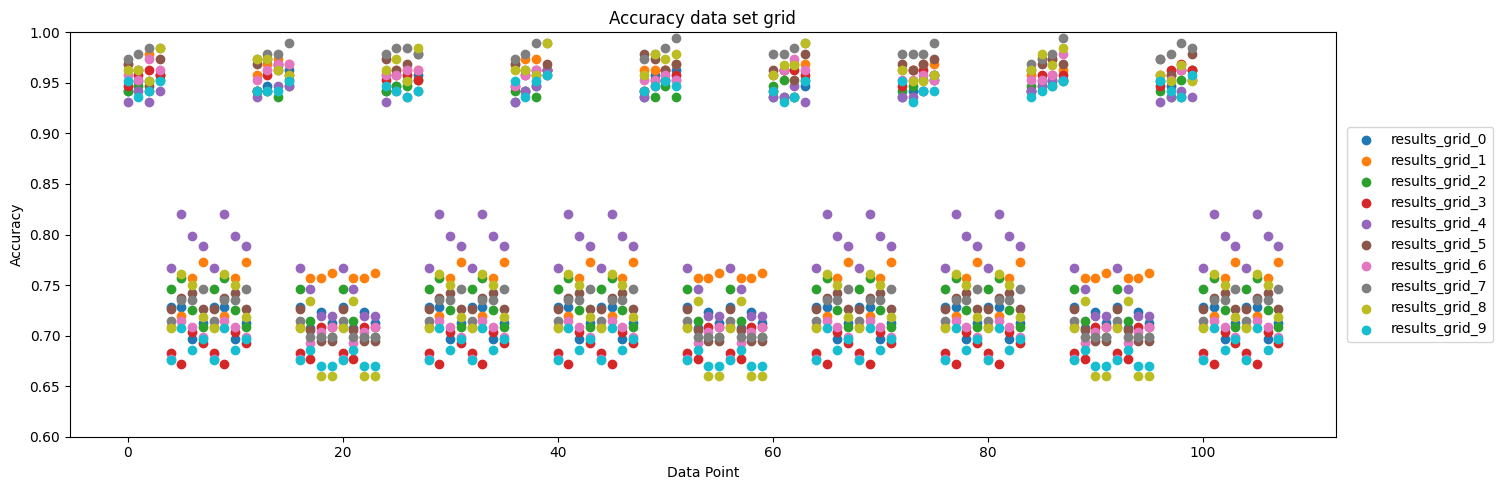

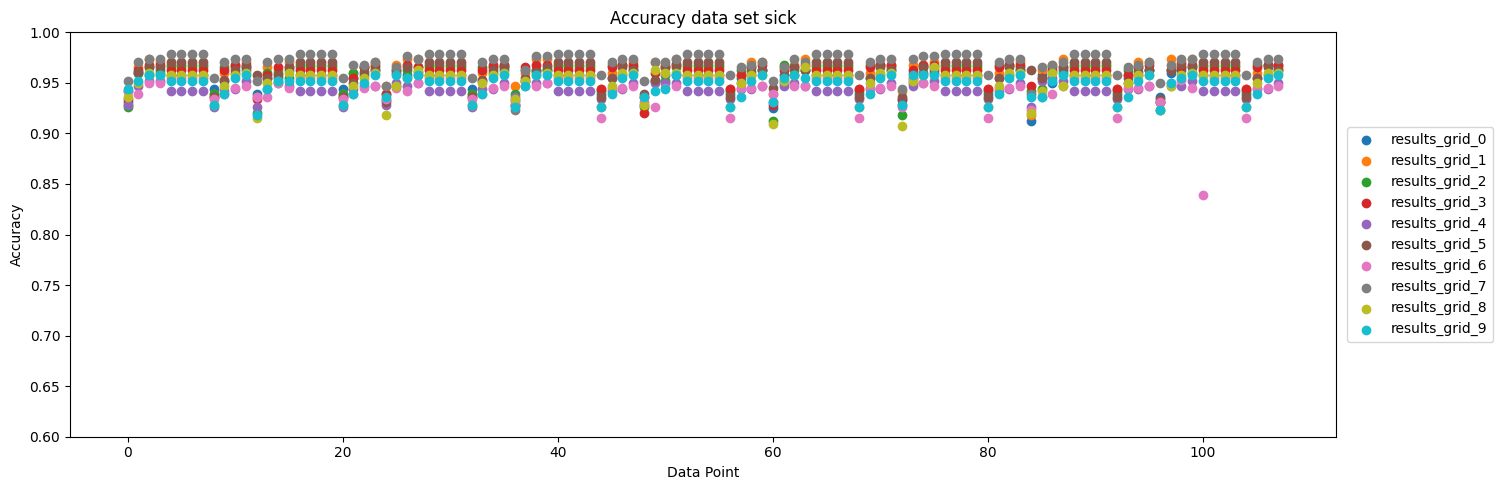

In [7]:
for key, data_list in results.items():
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))

    for i, df in enumerate(data_list):
        ax.scatter(range(0, len(df)), df['Accuracy'], label=f'results_grid_{i}')

    ax.set_title(f'Accuracy data set {key}')
    ax.set_xlabel('Data Point')
    ax.set_ylabel('Accuracy')
    ax.set_ylim(0.6, 1)
    ax.legend(loc='center right', bbox_to_anchor=(1.13, 0.5))

    plt.tight_layout()
    plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

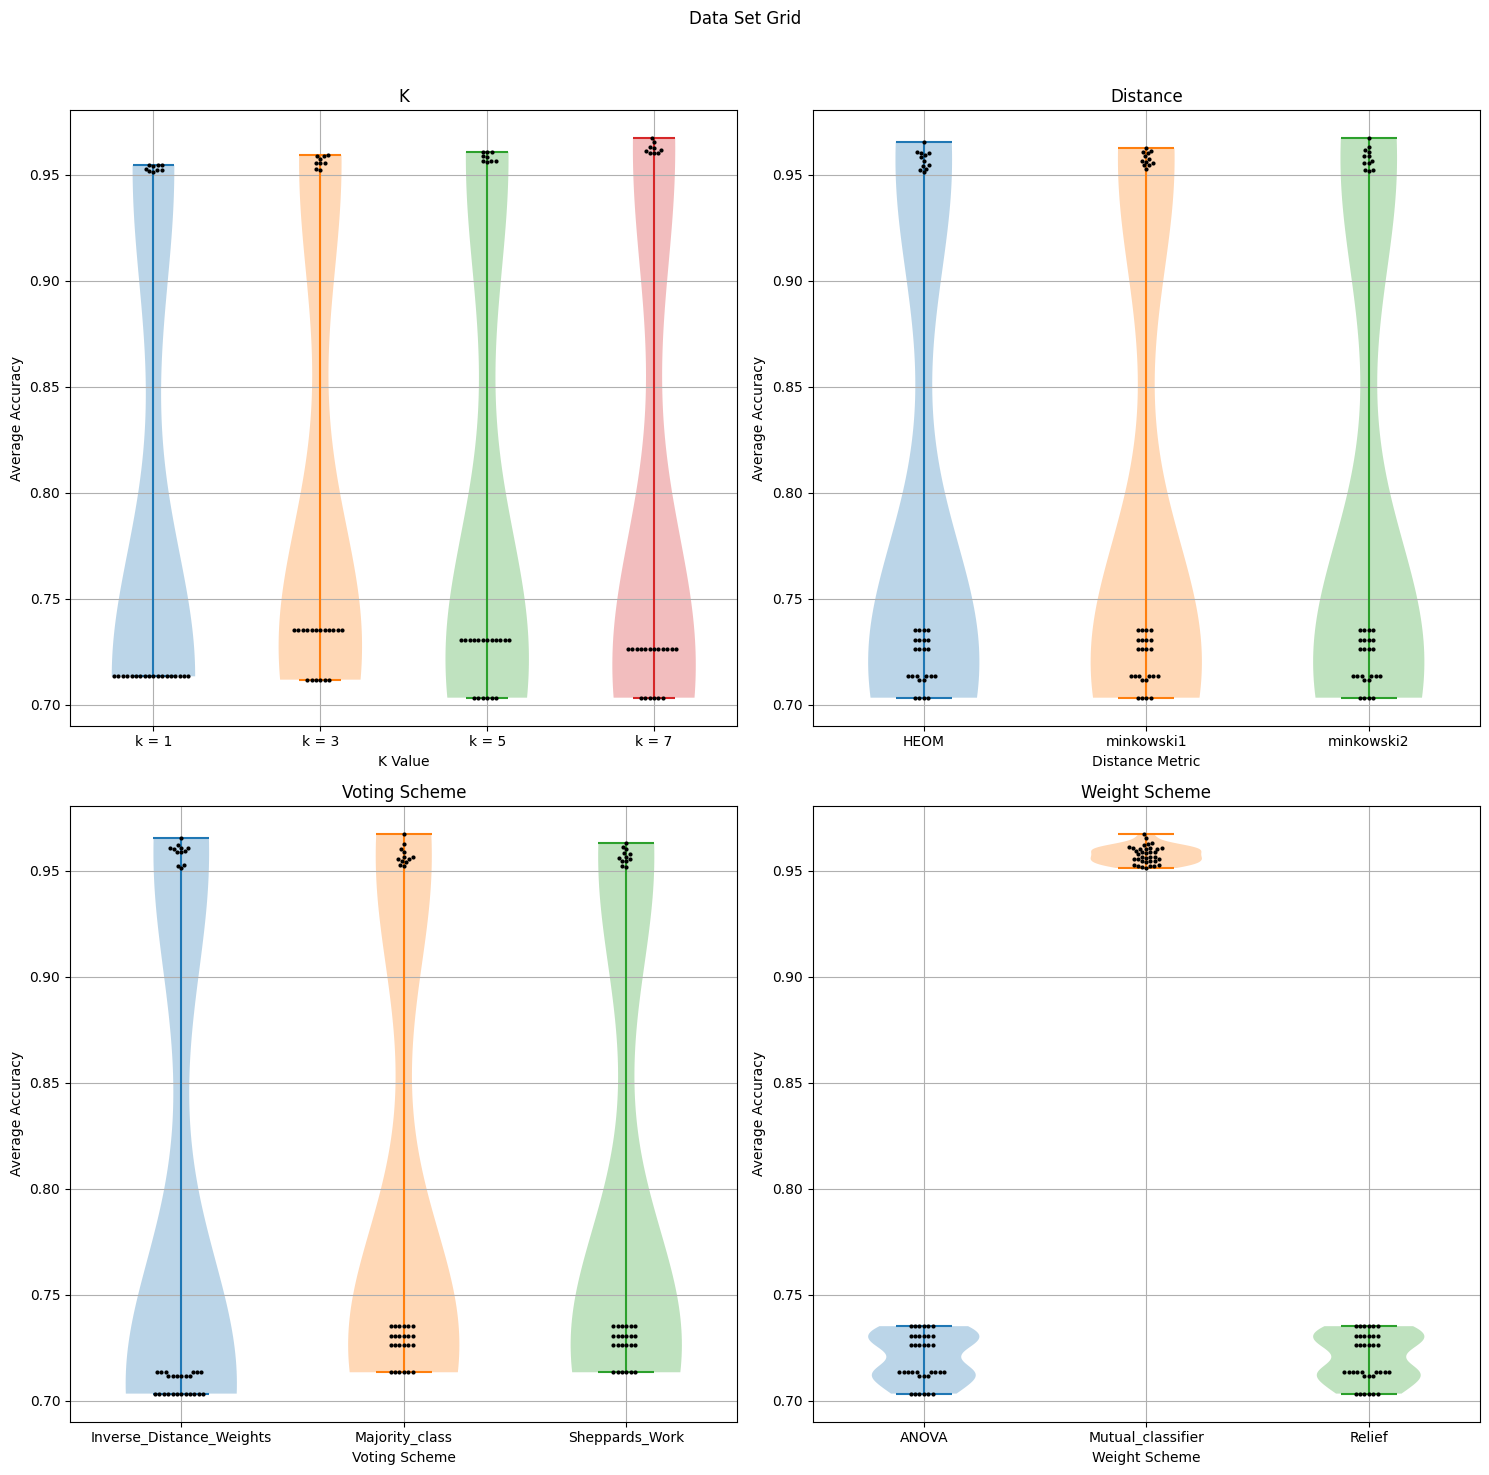

In [8]:
average_accuracy(averaged_grid, 'Data Set Grid')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

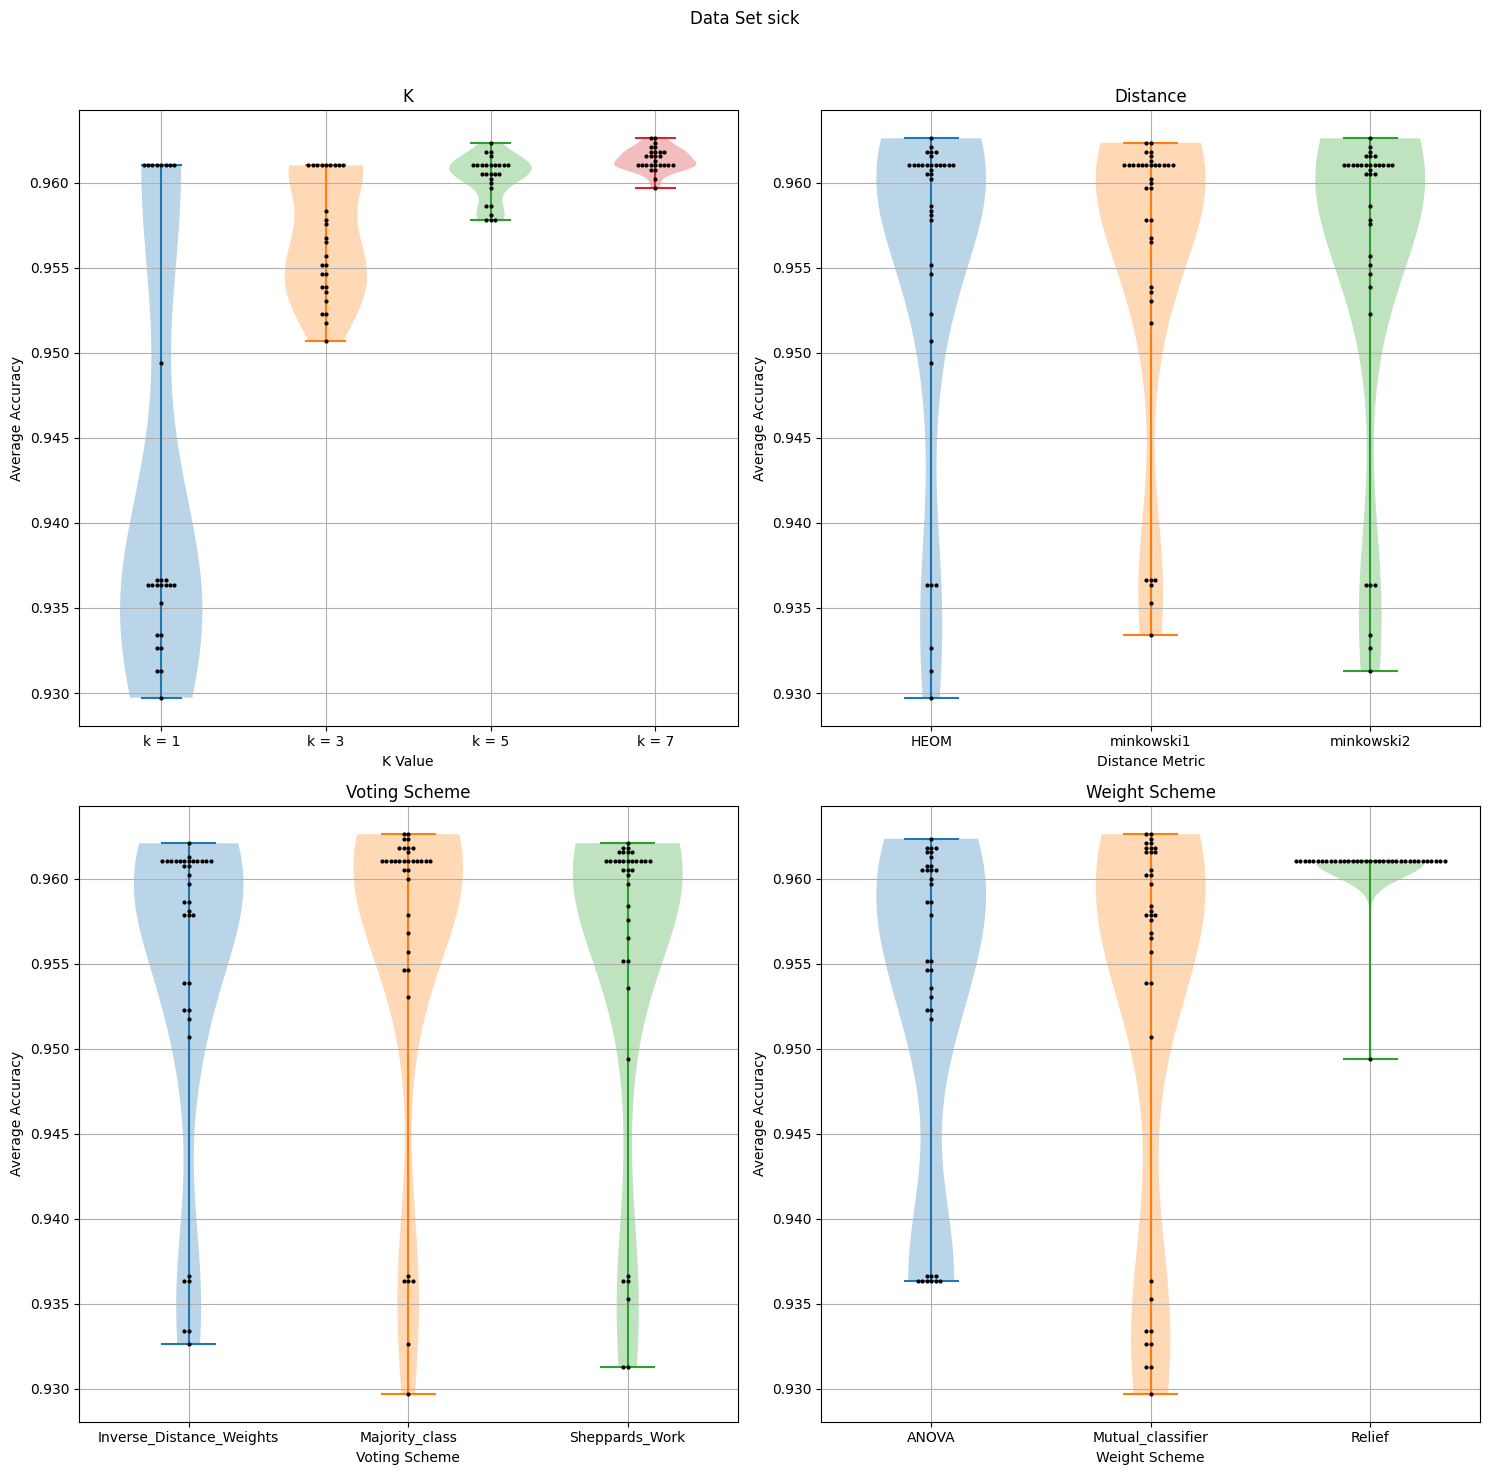

In [9]:
average_accuracy(averaged_sick, 'Data Set sick')

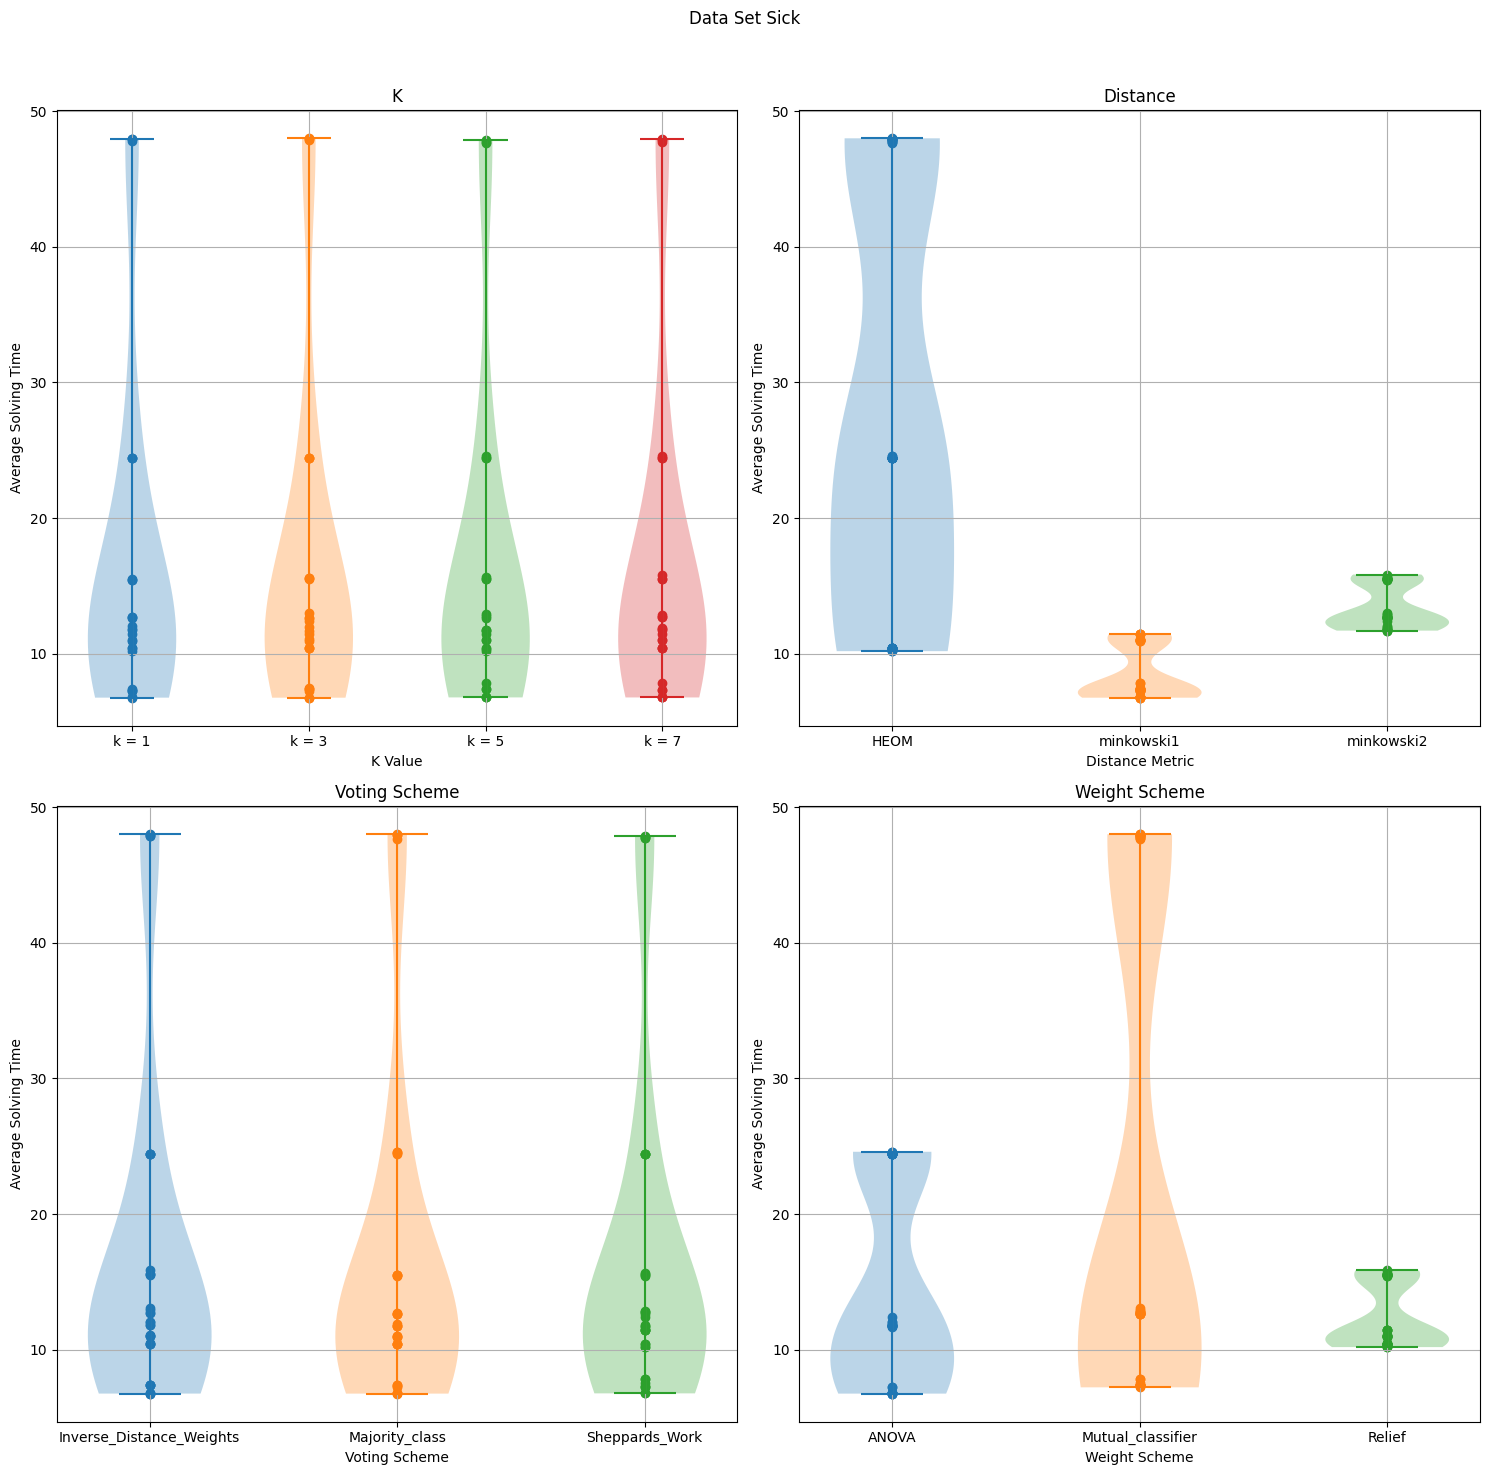

In [10]:
average_time(averaged_sick, 'Data Set Sick')

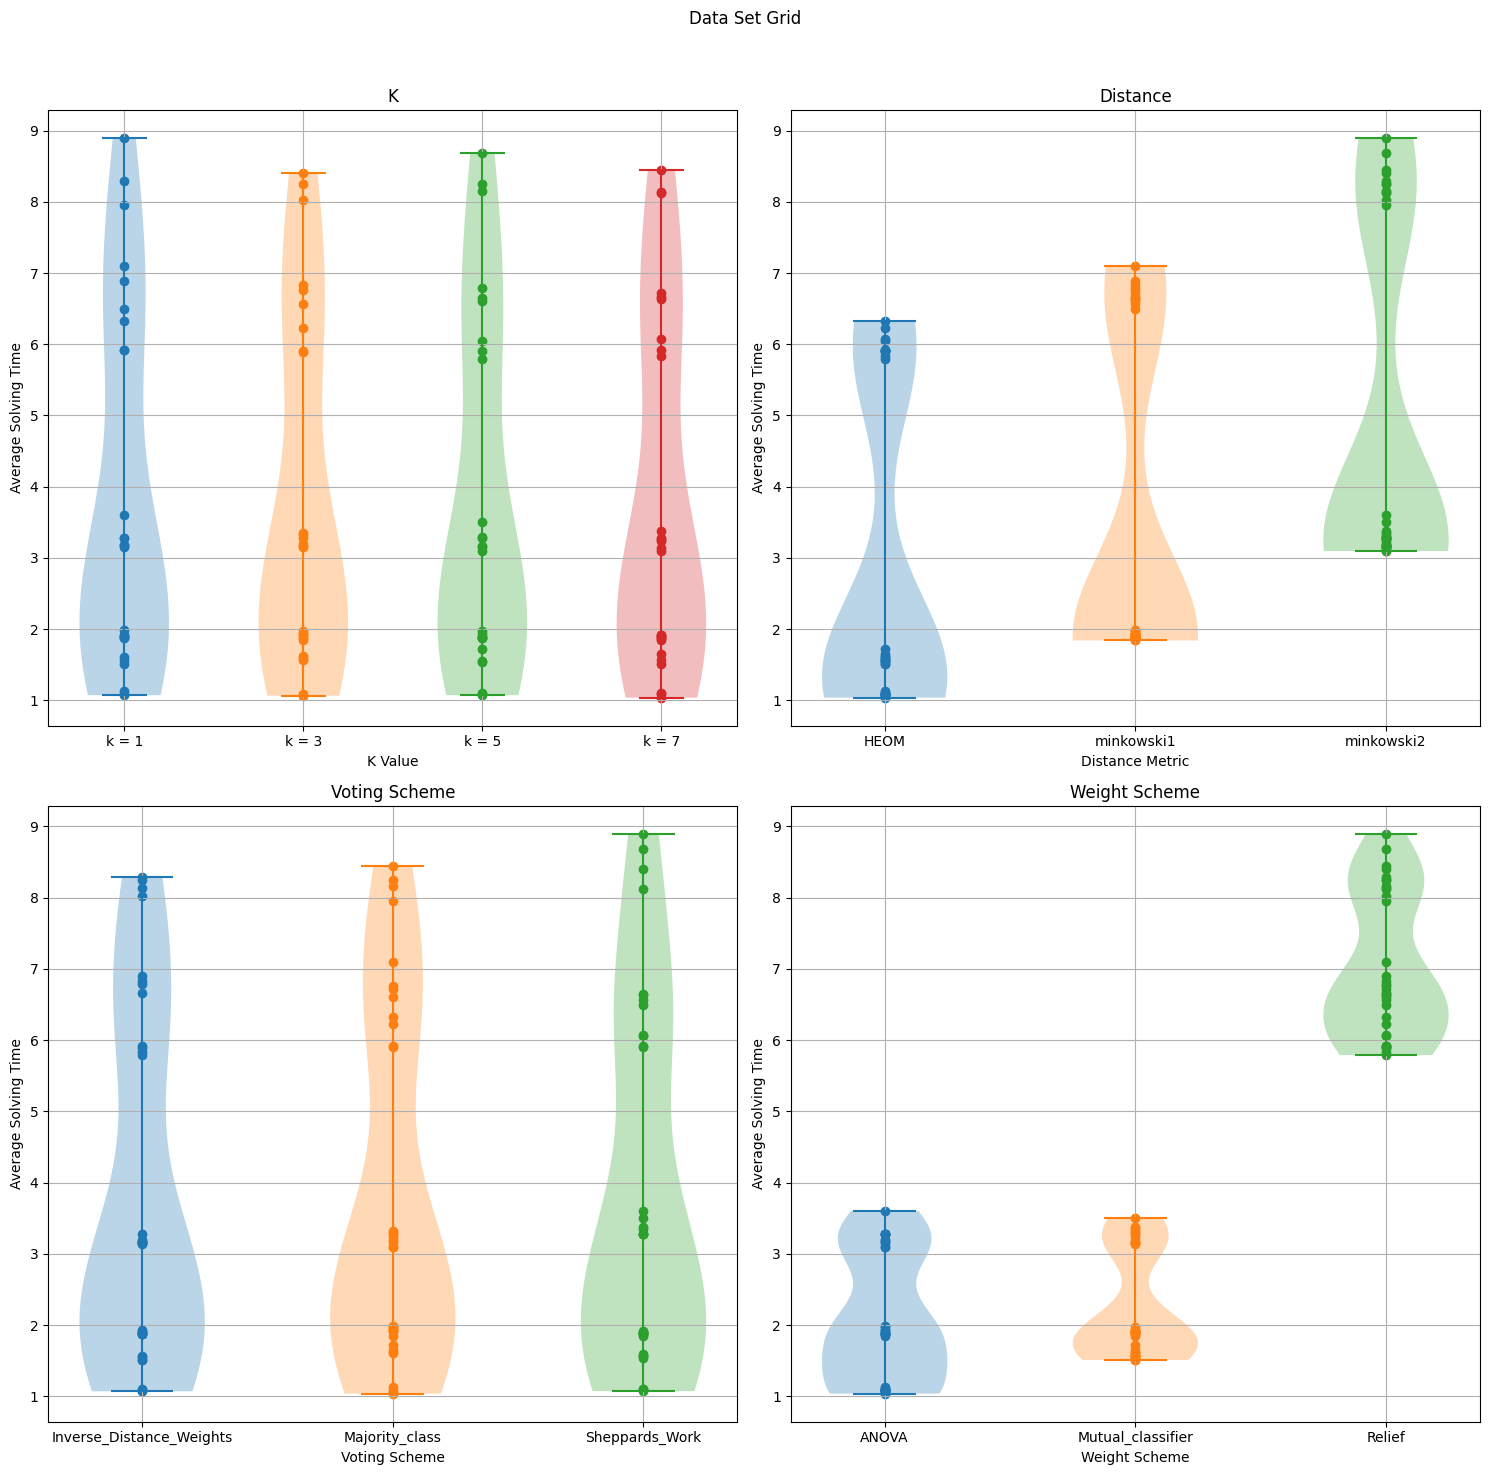

In [11]:
average_time(averaged_grid, 'Data Set Grid')

## Mejor modelo para cada dataset

In [23]:
m = averaged_grid.sort_values(by=['Accuracy', 'Solving Time'], ascending=[False, True]).iloc[0:10,:]
m.sort_values(by=['Solving Time'], ascending=[True])

,K,Distance,Voting scheme,Weight scheme,Accuracy,Solving Time
82,7,HEOM,Inverse_Distance_Weights,Mutual_classifier,0.965566,1.510607
55,5,HEOM,Inverse_Distance_Weights,Mutual_classifier,0.960790,1.547328
64,5,minkowski1,Inverse_Distance_Weights,Mutual_classifier,0.960796,1.885483
91,7,minkowski1,Inverse_Distance_Weights,Mutual_classifier,0.960275,1.910282
97,7,minkowski1,Sheppards_Work,Mutual_classifier,0.961325,1.917525
94,7,minkowski1,Majority_class,Mutual_classifier,0.962391,1.923880
100,7,minkowski2,Inverse_Distance_Weights,Mutual_classifier,0.961862,3.142902
73,5,minkowski2,Inverse_Distance_Weights,Mutual_classifier,0.960801,3.169944
103,7,minkowski2,Majority_class,Mutual_classifier,0.967162,3.240735
106,7,minkowski2,Sheppards_Work,Mutual_classifier,0.962915,3.372220


In [22]:
m = averaged_sick.sort_values(by=['Accuracy', 'Solving Time'], ascending=[False, True]).iloc[0:10,:]
m.sort_values(by=['Solving Time'], ascending=[True])

,K,Distance,Voting scheme,Weight scheme,Accuracy,Solving Time
96,7,minkowski1,Sheppards_Work,ANOVA,0.961817,6.785640
93,7,minkowski1,Majority_class,ANOVA,0.962347,6.788572
94,7,minkowski1,Majority_class,Mutual_classifier,0.961816,7.363126
67,5,minkowski1,Majority_class,Mutual_classifier,0.962345,7.395055
102,7,minkowski2,Majority_class,ANOVA,0.961818,11.889458
103,7,minkowski2,Majority_class,Mutual_classifier,0.962612,12.694141
100,7,minkowski2,Inverse_Distance_Weights,Mutual_classifier,0.962080,12.735714
84,7,HEOM,Majority_class,ANOVA,0.961818,24.593560
88,7,HEOM,Sheppards_Work,Mutual_classifier,0.962082,47.699210
85,7,HEOM,Majority_class,Mutual_classifier,0.962613,47.936316
